# NBA Game Analysis: Knicks vs Nets (2010 & 2014)
This project explores NBA game data, focusing on the performance of the New York Knicks and the Brooklyn Nets in the **2010** and **2014** seasons. The analysis will focus on scoring trends, compare team performances, evaluate home vs away results, and test statistical relationships.

The goal is to showcase exploratory data analysis (EDA) techniques using Python, Pandas, Matplotlib, Seaborn, and Scipy.

## 1. Import Libraries & Load Data
We start by importing the necessary libraries and loading the NBA dataset.

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, precision = 2)

## 2. Data Overview
We take a first look at the dataset and understand the structure of the data.

In [4]:
nba = pd.read_csv('nba_games.csv')

# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())
print(nba_2014.head())

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310

9.731707317073173


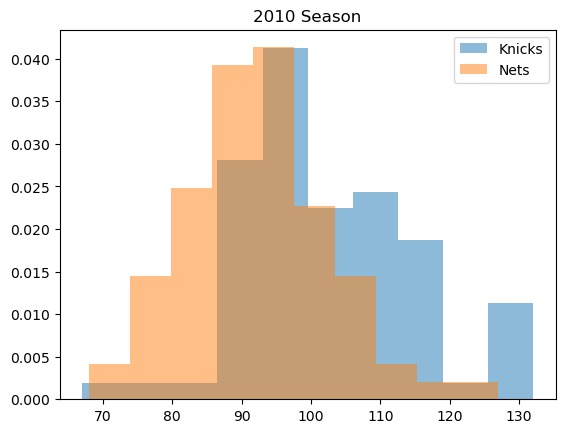

<Figure size 640x480 with 0 Axes>

In [5]:
#2010 points compared between Knicks and Nets through overlapping histograms
knicks_pts_10 = nba_2010[nba_2010.fran_id == 'Knicks']['pts']
nets_pts_10 = nba_2010[nba_2010.fran_id == 'Nets']['pts']
diff_means_2010 = np.mean(knicks_pts_10) - np.mean(nets_pts_10)
print(diff_means_2010)

plt.hist(knicks_pts_10, alpha=0.5, density=True, label='Knicks')
plt.hist(nets_pts_10, alpha=0.5, density=True, label='Nets')
plt.legend()
plt.title('2010 Season')
plt.show()

plt.clf()

0.44706798131809933


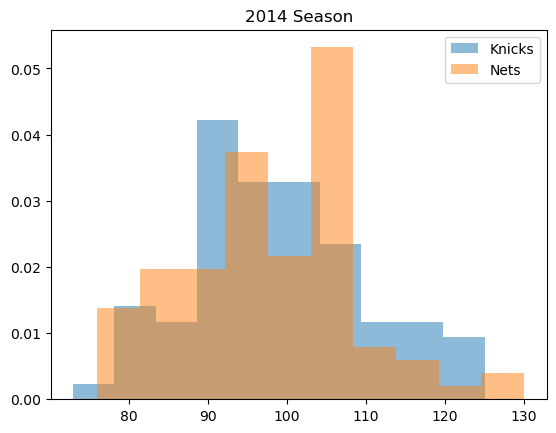

<Figure size 640x480 with 0 Axes>

In [6]:
# 2014 points compared between Knicks and Nets through overlapping histograms
knicks_pts_14 = nba_2014[nba_2014.fran_id == 'Knicks']['pts']
nets_pts_14 = nba_2014[nba_2014.fran_id == 'Nets']['pts']
diff_means_2014 = np.mean(knicks_pts_14) - np.mean(nets_pts_14)
print(diff_means_2014)

plt.hist(knicks_pts_14, alpha=0.5, density=True, label='Knicks')
plt.hist(nets_pts_14, alpha=0.5, density=True, label='Nets')
plt.legend()
plt.title('2014 Season')
plt.show()

plt.clf()

## 3. Data Analysis & Visualizations

## Knicks vs Nets Points Distribution (2010)
We compare the scoring distributions of the Knicks and Nets during the 2010 season.

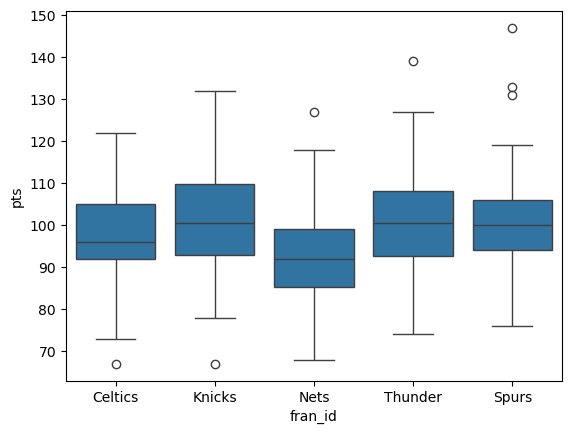

In [7]:
# Boxplot of Season 2010
sns.boxplot(data=nba_2010, x='fran_id', y='pts')
plt.show()

## Chi-Square Test
We calculate the expected contingency table and perform a chi-square test to check independence of game results and location.

In [8]:
# Table of frequencies (contingency) of results home or away
location_results_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_results_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In [9]:
# Table of proportions of results
location_result_proportions = location_results_freq / len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [10]:
# Expected contingency table and Chi-Square
chi2, pval, dof, expected = chi2_contingency(location_results_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


## Covariance & Correlation
We analyze the relationship between forecasted win probability and point difference.

In [11]:
# Covariance and correlation between the forecast and point difference calculated by 'FiveThirtyEight'
point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_cov)

point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

[[  0.05   1.37]
 [  1.37 186.56]]
PearsonRResult(statistic=0.4402088708468081, pvalue=9.41039157313972e-23)


## Scatterplot of Forecast vs Point Difference
We visualize the correlation between forecasted points by 'FiveThirtyEight' and actual point differential.

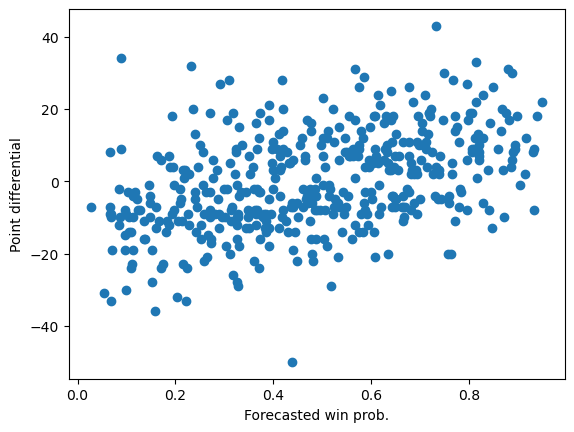

In [12]:
plt.clf()
plt.scatter(nba_2010['forecast'], nba_2010['point_diff'])
plt.xlabel('Forecasted win prob.')
plt.ylabel('Point differential')
plt.show()

## Barplot of average points
We visualize how the average points from the Knicks and the Nets compare in both 2010 and 2014 using side by side bars.

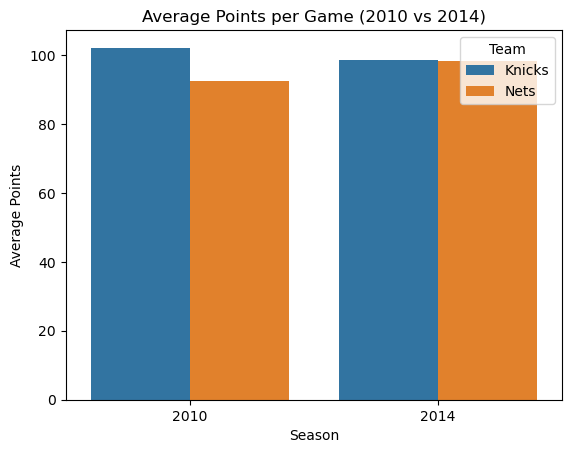

In [14]:
avg_pts = (nba[nba.fran_id.isin(["Knicks", "Nets"]) & nba.year_id.isin([2010,2014])].groupby(["year_id","fran_id"])["pts"].mean().reset_index())

sns.barplot(data=avg_pts, x="year_id", y="pts", hue="fran_id")
plt.title("Average Points per Game (2010 vs 2014)")
plt.ylabel("Average Points")
plt.xlabel("Season")
plt.legend(title="Team") 
plt.show()

## 4. Knicks vs Nets Points Distribution (2014)
We now compare the scoring distributions of the Knicks and Nets during the 2014 season.

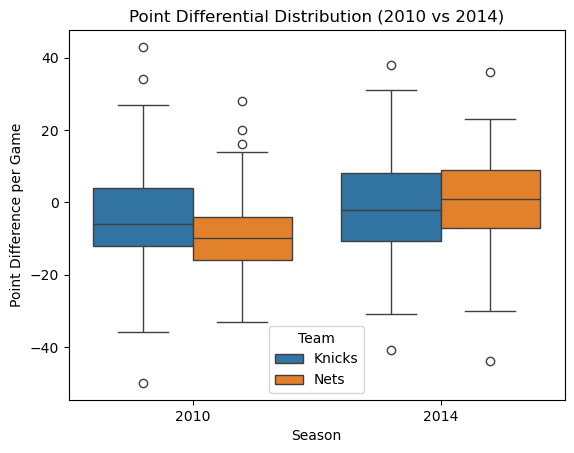

In [16]:
sns.boxplot(
    data=nba[nba.fran_id.isin(["Knicks", "Nets"]) & nba.year_id.isin([2010,2014])],
    x="year_id", y="point_diff", hue="fran_id"
)
plt.title("Point Differential Distribution (2010 vs 2014)")
plt.ylabel("Point Difference per Game")
plt.xlabel("Season")
plt.legend(title="Team")
plt.show()

## 4. Conclusions
* Scoring Trends:
The analysis shows how the Knicks and Nets differed in average points per game across the 2010 and 2014 seasons. Histograms and boxplots highlight variation in performance and the spread of scores.
* Home vs Away Results:
The contingency table and chi-square test suggest whether playing at home or away had a statistically significant relationship with game outcomes. This provides insight into the impact of home-court advantage.
* Forecast Accuracy:
The correlation between FiveThirtyEight’s forecasted win probability and the actual point differential indicates that the predictions aligned quite well with real performance. Although not perfect, the positive correlation confirms that forecasts had predictive value.